# **Sentiment Analysis using RNN model**

In [1]:
#Import Libraries
from tensorflow.keras.datasets import imdb
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.python.keras.preprocessing import sequence
from tensorflow.python.keras.layers import Embedding,SimpleRNN,Dense
from tensorflow.python.keras.models import Sequential

In [2]:
#Load IMBD dataset from keras 
((XT,YT),(Xt,Yt)) = imdb.load_data(num_words=10000)

print('Dataset Loaded!')

Dataset Loaded!


In [3]:
print("Training Dataset length ", len(XT))
print("Testing Dataset length ", len(Xt))

Training Dataset length  25000
Testing Dataset length  25000


In [4]:
#print single review
print("Numerical representation of review :",XT[0])
#length of the review
print("length of review:",len(XT[0]))

Numerical representation of review : [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
length of review: 218


In [5]:
#convert numeric review to words
word_idx = imdb.get_word_index()
idx_word = dict([value,key] for (key,value) in word_idx.items())
actual_review = ' '.join([idx_word.get(idx-3,'?') for idx in XT[0]])
print(actual_review)
print(len(actual_review.split()))

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

Here, we are assuming that each review’s maximum length should be 500. If it is less than that, then add extra 0’s at the end of the array. 

In [8]:
#perform padding operation
X_train = sequence.pad_sequences(XT,maxlen=500)
X_test = sequence.pad_sequences(Xt,maxlen=500)

print("Padding Completed!")

Padding Completed!


In [9]:
print(X_train.shape)
print(X_test.shape)

(25000, 500)
(25000, 500)


####**RNN Model creation**

In [10]:
model = Sequential()
model.add(Embedding(10000,64))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          640000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                3104      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 643,137
Trainable params: 643,137
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

print("Model Compiled Successfully!")

Model Compiled Successfully!


In [12]:
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False)
earlystop = EarlyStopping(monitor='val_acc',patience=1)

print("Callbacks Created Successfully!")

Callbacks Created Successfully!


### **Train Model**

In [13]:
hist = model.fit(X_train,YT,validation_split=0.2,epochs=10,batch_size=128,callbacks=[checkpoint,earlystop])

Epoch 1/10
157/157 [==============================] - 35s 225ms/step - loss: 0.5472 - acc: 0.7106 - val_loss: 0.3718 - val_acc: 0.8490
Epoch 2/10
157/157 [==============================] - 34s 216ms/step - loss: 0.3297 - acc: 0.8689 - val_loss: 0.4059 - val_acc: 0.8216


**Training Loss vs Validation Loss**

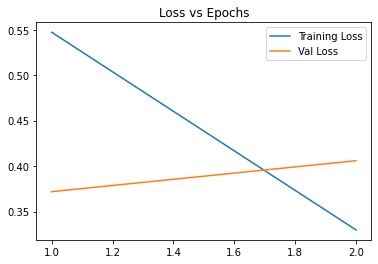

In [14]:
import matplotlib.pyplot as plt

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1,len(loss)+1)

plt.title("Loss vs Epochs")
plt.plot(epochs,loss,label="Training Loss")
plt.plot(epochs,val_loss,label="Val Loss")
plt.legend()
plt.show()

**Training Accuracy vs Validation Accuracy**

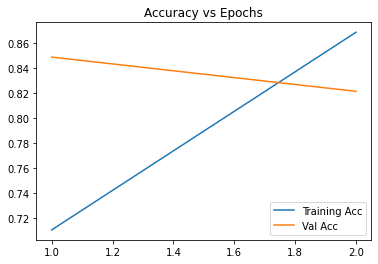

In [15]:
import matplotlib.pyplot as plt

acc = hist.history['acc']
val_acc = hist.history['val_acc']
epochs = range(1,len(loss)+1)

plt.title("Accuracy vs Epochs")
plt.plot(epochs,acc,label="Training Acc")
plt.plot(epochs,val_acc,label="Val Acc")
plt.legend()
plt.show()

**Improve the accuarcy**

 1. Increasing the number of words to 30000.
 2. Changing Hyperparameters

In [16]:
# Load the Dataset
((XT,YT),(Xt,Yt)) = imdb.load_data(num_words=30000)
print("The length of the Training Dataset is ", len(XT))
print("The length of the Testing Dataset is ", len(Xt))

# Perform the padding
X_train = sequence.pad_sequences(XT,maxlen=500)
X_test = sequence.pad_sequences(Xt,maxlen=500)

# Create the Model Architecture
model = Sequential()
model.add(Embedding(30000,128))
model.add(SimpleRNN(64))
model.add(Dense(1,activation='sigmoid'))

# Compile the Model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

# Create the Callbacks
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False)
earlystop = EarlyStopping(monitor='val_acc',patience=1)

# Train the Model
hist = model.fit(X_train,YT,validation_split=0.2,epochs=10,batch_size=128,callbacks=[checkpoint,earlystop])


The length of the Training Dataset is  25000
The length of the Testing Dataset is  25000
Epoch 1/10
157/157 [==============================] - 59s 373ms/step - loss: 0.6347 - acc: 0.6242 - val_loss: 0.4611 - val_acc: 0.7950
Epoch 2/10
157/157 [==============================] - 59s 377ms/step - loss: 0.3417 - acc: 0.8555 - val_loss: 0.4216 - val_acc: 0.8116
Epoch 3/10
157/157 [==============================] - 58s 371ms/step - loss: 0.2214 - acc: 0.9075 - val_loss: 0.4471 - val_acc: 0.8054


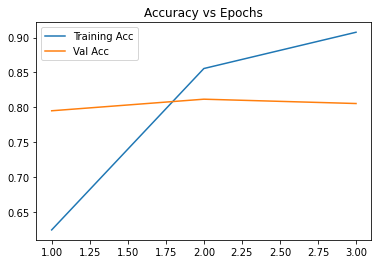

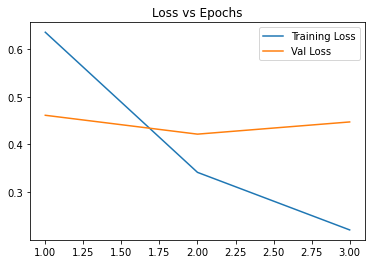

In [17]:
import matplotlib.pyplot as plt

# Validation Accuracy vs Training Accuracy
acc = hist.history['acc']
val_acc = hist.history['val_acc']
epochs = range(1,len(acc)+1)
plt.title("Accuracy vs Epochs")
plt.plot(epochs,acc,label="Training Acc")
plt.plot(epochs,val_acc,label="Val Acc")
plt.legend()
plt.show()

# Validation Loss vs Training Loss
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1,len(loss)+1)
plt.title("Loss vs Epochs")
plt.plot(epochs,loss,label="Training Loss")
plt.plot(epochs,val_loss,label="Val Loss")
plt.legend()
plt.show()

**Test the model**

In [18]:
model.evaluate(X_test,Yt)

782/782 [==============================] - 31s 40ms/step - loss: 0.4448 - acc: 0.8075


[0.44478458166122437, 0.807479977607727]

**Predcition sentiment on new review**

In [20]:
sent = "This movie is really bad . I do not like this movie because the direction was horrible ."
inp = []

# Get the word:integer mapping
word_idx = imdb.get_word_index()

# Convert each word to integer
for word in sent.split():
  if word in word_idx.keys():
    inp.append(word_idx[word])
  else:
    inp.append(1)

print(inp) 

# Perform the padding
final_input = sequence.pad_sequences([inp],maxlen=500)

# Finally predict the sentiment
value_res=model.predict(final_input)

if value_res >0.5 and value_res<1:
  print("Sentiment is Negative")
else:
  print("Sentiment is Positive")

[1, 17, 6, 63, 75, 1, 1, 78, 21, 37, 11, 17, 85, 1, 455, 13, 524, 1]
Sentiment is Negative
